#**Modelo para clusterizar clientes**
##**Elaborado por:** Antonella Arcos
###**Exploración de datos**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# Separar en train y test
from sklearn.model_selection import train_test_split
# Para escalar datos
from sklearn.preprocessing import StandardScaler


In [ ]:
# Importar una librería
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Cargar la data
df1 = pd.read_excel('/content/drive/MyDrive/CODING_DOJO/proyecto_2/clusterclientes1.xlsx')

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12392 entries, 0 to 12391
Data columns (total 39 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Etiquetas de fila     12392 non-null  int64  
 1   HR_leve               11763 non-null  float64
 2   ST_leve               11763 non-null  float64
 3   HR_leve1              11435 non-null  float64
 4   ST_leve1              11435 non-null  float64
 5   HR_leve2              586 non-null    float64
 6   ST_leve2              586 non-null    float64
 7   HR_moderado           9808 non-null   float64
 8   ST_moderado           9808 non-null   float64
 9   HR_moderado1          332 non-null    float64
 10  ST_moderado1          332 non-null    float64
 11  HR_intenso            4904 non-null   float64
 12  ST_intenso            4904 non-null   float64
 13  HR_intenso1           88 non-null     float64
 14  HR_intenso1.1         88 non-null     float64
 15  HR                 

###**Limpieza y data mining**

In [ ]:
df1.isna().sum()

Etiquetas de fila           0
HR_leve                   629
ST_leve                   629
HR_leve1                  957
ST_leve1                  957
HR_leve2                11806
ST_leve2                11806
HR_moderado              2584
ST_moderado              2584
HR_moderado1            12060
ST_moderado1            12060
HR_intenso               7488
ST_intenso               7488
HR_intenso1             12304
HR_intenso1.1           12304
HR                          0
ST                          0
goal_completion             0
Genero                      0
articulos deportivos     3155
cinemark                 3155
nike                     3155
juanvaldez               3155
niuhom                   3155
tipti                    3155
premios                  3155
estado                      0
categoria                   0
ratiocanje                  0
ratioexp                    0
goals                       0
canje                       0
VHR                         0
VNA       

In [ ]:
df1 = df1.fillna(0)
#puedo poner ceros porque significa que no cumplen con el criterio

In [ ]:
df1.isna().sum()

id                      0
HR_leve                 0
ST_leve                 0
HR_leve1                0
ST_leve1                0
HR_leve2                0
ST_leve2                0
HR_moderado             0
ST_moderado             0
HR_moderado1            0
ST_moderado1            0
HR_intenso              0
ST_intenso              0
HR_intenso1             0
HR_intenso1.1           0
HR                      0
ST                      0
goal_completion         0
Genero                  0
articulos deportivos    0
cinemark                0
nike                    0
juanvaldez              0
niuhom                  0
tipti                   0
premios                 0
estado                  0
categoria               0
ratiocanje              0
ratioexp                0
goals                   0
canje                   0
VHR                     0
VNA                     0
VHC                     0
NSD                     0
steps                   0
heartrate               0
st+hr       

In [ ]:
df1.rename(columns = {'Etiquetas de fila':'id'}, inplace = True)

####**Visualización y exploración de datos**

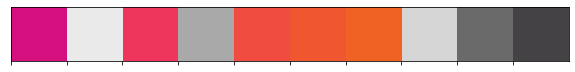

In [ ]:
my_palette=['#D5107E','#EBEAEA','#EE355C','#A9A9A9', '#F04C40', '#F05731', '#F06124', '#D5D5D5', '#6A6A6A','#444244'] 
sns.set_palette(my_palette)
sns.palplot(sns.color_palette())

In [ ]:
# Estadistica descriptiva de la base de datos
df1.describe()
#al rededor del 73% de las metas se cumplen para las personas que sincronizan actividad física desde octubre

,id,HR_leve,ST_leve,HR_leve1,ST_leve1,HR_leve2,ST_leve2,HR_moderado,ST_moderado,HR_moderado1,...,ratioexp,goals,canje,VHR,VNA,VHC,NSD,steps,heartrate,st+hr
count,1.239200e+04,12392.000000,12392.000000,12392.000000,12392.000000,12392.000000,12392.000000,12392.000000,12392.000000,12392.000000,...,12392.000000,12392.000000,12392.000000,12392.000000,12392.000000,12392.000000,12392.000000,12392.000000,12392.000000,12392.000000
mean,3.191093e+07,0.018480,32.385652,1.736524,13.093286,0.037524,0.403405,4.773886,5.420755,0.065849,...,0.157685,0.642834,0.732247,0.368141,0.379923,0.975387,0.434232,0.475629,0.017592,0.506779
std,4.782441e+05,0.135281,26.538102,4.445082,17.103176,0.448956,3.675112,8.959050,10.639416,0.950229,...,0.273592,0.479184,0.442806,0.482319,0.485387,2.284564,0.495676,0.499426,0.131468,0.499974
min,3.134734e+07,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.148534e+07,0.000000,11.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.176562e+07,0.000000,26.000000,0.000000,6.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,3.229291e+07,0.000000,48.000000,1.000000,17.000000,0.000000,0.000000,6.000000,5.000000,0.000000,...,0.194175,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000
max,3.310190e+07,2.000000,148.000000,104.000000,145.000000,19.000000,92.000000,91.000000,107.000000,39.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
round(df1['categoria'].value_counts() / df1.shape[0] * 100, 2)
#El 73.22% de personas que hace ejercicio canjea premios

BRONZE      31.55
PLATINUM    27.91
SILVER      23.52
GOLD        17.03
Name: categoria, dtype: float64

La mayoria de gente se agrupa en la categoría Bronce y Platinum.

In [ ]:
df1 = df1.fillna(0)

In [ ]:
df1['categoria'].value_counts(dropna = False)

1    3910
4    3458
2    2914
3    2110
Name: categoria, dtype: int64

In [ ]:
df1.loc[df1['categoria']=='BRONZE', 'categoria']='1'
df1.loc[df1['categoria']=='SILVER', 'categoria']='2'
df1.loc[df1['categoria']=='GOLD', 'categoria']='3'
df1.loc[df1['categoria']=='PLATINUM', 'categoria']='4'

In [ ]:
df1['categoria'].value_counts(dropna = False)

1    3910
4    3458
2    2914
3    2110
Name: categoria, dtype: int64

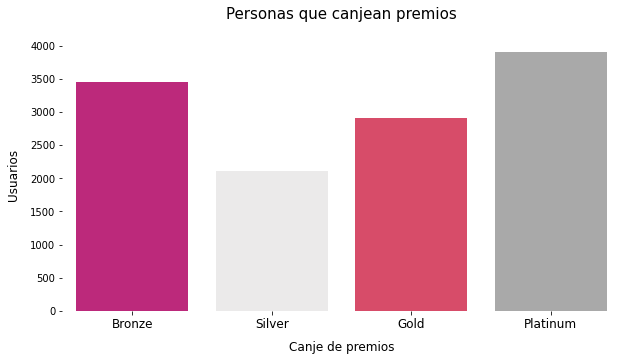

In [ ]:
# Cantidad de gente por categoria
df1['Count'] = 1
df2 = df1.groupby(['categoria'])[['Count']].sum().reset_index()

sns.barplot(data = df2, x = 'categoria', y ='Count', order=["PLATINUM", "GOLD","SILVER","BRONZE"])
plt.title('Personas por categoría', fontsize = 15, pad = 20)
plt.ylabel('Usuarios', fontsize = 12, labelpad = 10)
plt.xlabel('Canje de premios', fontsize = 12, labelpad = 10)
plt.xticks([0,1,2,3], ['Bronze', 'Silver','Gold','Platinum'], rotation = 0, fontsize = 12)
sns.despine(left = True, bottom = True)
plt.gcf().set_size_inches(10 ,5);

In [ ]:
 
# Find the order
my_order = df1.groupby(by=["categoria"])["goal_completion"].median().iloc[::-1].index
my_order

Index(['SILVER', 'PLATINUM', 'GOLD', 'BRONZE'], dtype='object', name='categoria')

No handles with labels found to put in legend.


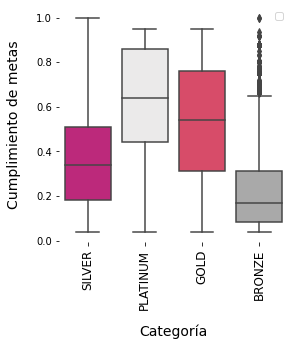

In [ ]:
#Cumplimiento de metas por categoría
sns.catplot(data=df1, kind='box', x='categoria', y='goal_completion', sharey=True, height=4, order=my_order)
#plt.title('Cumplimiento de metas por categoría', fontsize=18, pad=20)
plt.xticks(fontsize=12, rotation=90)
plt.xlabel('Categoría', fontsize=14, labelpad=15)
plt.ylabel('Cumplimiento de metas', fontsize=14, labelpad=15)
sns.despine(left=True, bottom=True)
plt.legend(bbox_to_anchor=(1.0, 1.0))
plt.show()

No handles with labels found to put in legend.


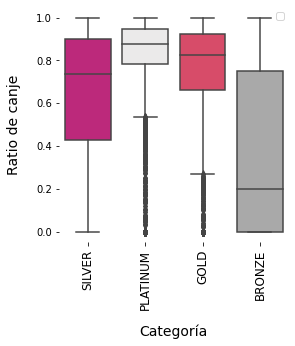

In [ ]:
#Ratio de canje por categoría
sns.catplot(data=df1, kind='box', x='categoria', y='ratiocanje', sharey=True, height=4, order=my_order)
#plt.title('Cumplimiento de metas por categoría', fontsize=18, pad=20)
plt.xticks(fontsize=12, rotation=90)
plt.xlabel('Categoría', fontsize=14, labelpad=15)
plt.ylabel('Ratio de canje', fontsize=14, labelpad=15)
sns.despine(left=True, bottom=True)
plt.legend(bbox_to_anchor=(1.0, 1.0))
plt.show()

In [ ]:
df1.shape

(12392, 33)

Text(0.5, 0, 'Eventos de pasos')

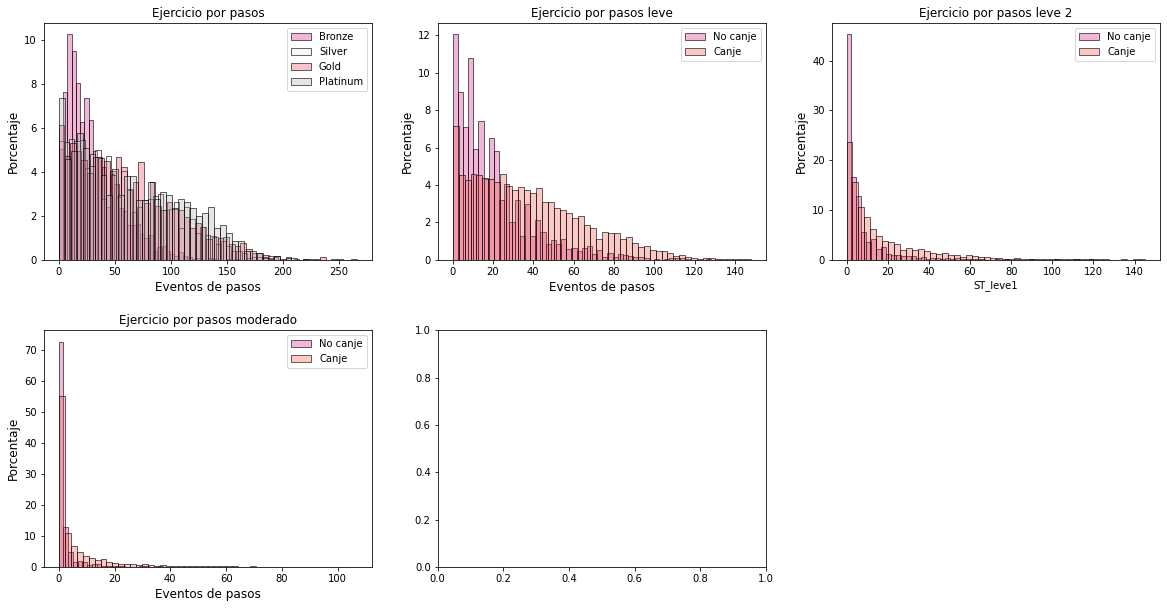

In [ ]:
# Distribucion de variables por canje - Histogramas

#Steps
fig, axes = plt.subplots(nrows = 2, ncols = 3, figsize = (20, 10), sharex = False, sharey = False)
plt.subplots_adjust(wspace = 0.2, hspace = 0.3)
axes[1, 2].axis('off')
sns.histplot(data = df1[df1['categoria'] == '1'], x = 'ST', stat = 'percent', bins = 50, color = my_palette[0], alpha = 0.3, label = 'Bronze', ax = axes[0, 0])
sns.histplot(data = df1[df1['categoria'] == '2'], x = 'ST', stat = 'percent', bins = 50, color = my_palette[1], alpha = 0.3, label = 'Silver', ax = axes[0, 0])
sns.histplot(data = df1[df1['categoria'] == '3'], x = 'ST', stat = 'percent', bins = 50, color = my_palette[2], alpha = 0.3, label = 'Gold', ax = axes[0, 0])
sns.histplot(data = df1[df1['categoria'] == '4'], x = 'ST', stat = 'percent', bins = 50, color = my_palette[3], alpha = 0.3, label = 'Platinum', ax = axes[0, 0])


axes[0, 0].set_title('Ejercicio por pasos', fontsize = 12)
axes[0, 0].legend()
axes[0, 0].set_ylabel('Porcentaje', fontsize = 12)
axes[0, 0].set_xlabel('Eventos de pasos', fontsize = 12)

# ST leve
sns.histplot(data = df1[df1['canje'] == 0], x = 'ST_leve', stat = 'percent', bins = 50, color = my_palette[0], alpha = 0.3, label = 'No canje', ax = axes[0, 1])
sns.histplot(data = df1[df1['canje'] == 1], x = 'ST_leve', stat = 'percent', bins = 50, color = my_palette[4], alpha = 0.3, label = 'Canje', ax = axes[0, 1])

axes[0, 1].set_title('Ejercicio por pasos leve', fontsize = 12)
axes[0, 1].legend()
axes[0, 1].set_ylabel('Porcentaje', fontsize = 12)
axes[0, 1].set_xlabel('Eventos de pasos', fontsize = 12)

# ST leve1
sns.histplot(data = df1[df1['canje'] == 0], x = 'ST_leve1', stat = 'percent', bins = 50, color = my_palette[0], alpha = 0.3, label = 'No canje', ax = axes[0, 2])
sns.histplot(data = df1[df1['canje'] == 1], x = 'ST_leve1', stat = 'percent', bins = 50, color = my_palette[4], alpha = 0.3, label = 'Canje', ax = axes[0, 2])

axes[0, 2].set_title('Ejercicio por pasos leve 2', fontsize = 12)
axes[0, 2].legend()
axes[0, 2].set_ylabel('Porcentaje', fontsize = 12)
axes[0, 1].set_xlabel('Eventos de pasos', fontsize = 12)


# ST moderado
sns.histplot(data = df1[df1['canje'] == 0], x = 'ST_moderado', stat = 'percent', bins = 50, color = my_palette[0], alpha = 0.3, label = 'No canje', ax = axes[1, 0])
sns.histplot(data = df1[df1['canje'] == 1], x = 'ST_moderado', stat = 'percent', bins = 50, color = my_palette[4], alpha = 0.3, label = 'Canje', ax = axes[1, 0])

axes[1, 0].set_title('Ejercicio por pasos moderado', fontsize = 12)
axes[1, 0].legend()
axes[1, 0].set_ylabel('Porcentaje', fontsize = 12)
axes[1, 0].set_xlabel('Eventos de pasos', fontsize = 12)



Text(0.5, 0, 'Eventos de frecuencia cardíaca')

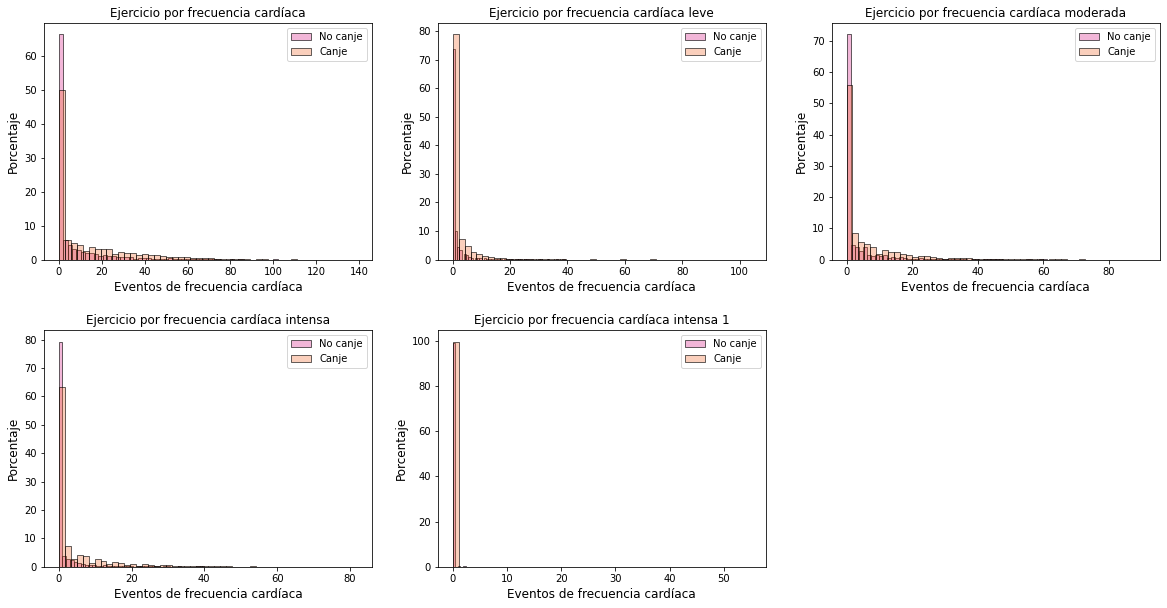

In [ ]:
# Distribucion de variables por canje - Histogramas

#HR
fig, axes = plt.subplots(nrows = 2, ncols = 3, figsize = (20, 10), sharex = False, sharey = False)
plt.subplots_adjust(wspace = 0.2, hspace = 0.3)
axes[1, 2].axis('off')
sns.histplot(data = df1[df1['canje'] == 0], x = 'HR', stat = 'percent', bins = 50, color = my_palette[0], alpha = 0.3, label = 'No canje', ax = axes[0, 0])
sns.histplot(data = df1[df1['canje'] == 1], x = 'HR', stat = 'percent', bins = 50, color = my_palette[4], alpha = 0.3, label = 'Canje', ax = axes[0, 0])

axes[0, 0].set_title('Ejercicio por frecuencia cardíaca', fontsize = 12)
axes[0, 0].legend()
axes[0, 0].set_ylabel('Porcentaje', fontsize = 12)
axes[0, 0].set_xlabel('Eventos de frecuencia cardíaca', fontsize = 12)

# ST leve
sns.histplot(data = df1[df1['canje'] == 0], x = 'HR_leve1', stat = 'percent', bins = 50, color = my_palette[0], alpha = 0.3, label = 'No canje', ax = axes[0, 1])
sns.histplot(data = df1[df1['canje'] == 1], x = 'HR_leve1', stat = 'percent', bins = 50, color = my_palette[4], alpha = 0.3, label = 'Canje', ax = axes[0, 1])

axes[0, 1].set_title('Ejercicio por frecuencia cardíaca leve', fontsize = 12)
axes[0, 1].legend()
axes[0, 1].set_ylabel('Porcentaje', fontsize = 12)
axes[0, 1].set_xlabel('Eventos de frecuencia cardíaca', fontsize = 12)

# ST leve1
sns.histplot(data = df1[df1['canje'] == 0], x = 'HR_moderado', stat = 'percent', bins = 50, color = my_palette[0], alpha = 0.3, label = 'No canje', ax = axes[0, 2])
sns.histplot(data = df1[df1['canje'] == 1], x = 'HR_moderado', stat = 'percent', bins = 50, color = my_palette[4], alpha = 0.3, label = 'Canje', ax = axes[0, 2])

axes[0, 2].set_title('Ejercicio por frecuencia cardíaca moderada', fontsize = 12)
axes[0, 2].legend()
axes[0, 2].set_ylabel('Porcentaje', fontsize = 12)
axes[0, 2].set_xlabel('Eventos de frecuencia cardíaca', fontsize = 12)


# ST moderado
sns.histplot(data = df1[df1['canje'] == 0], x = 'HR_intenso', stat = 'percent', bins = 50, color = my_palette[0], alpha = 0.3, label = 'No canje', ax = axes[1, 0])
sns.histplot(data = df1[df1['canje'] == 1], x = 'HR_intenso', stat = 'percent', bins = 50, color = my_palette[4], alpha = 0.3, label = 'Canje', ax = axes[1, 0])

axes[1, 0].set_title('Ejercicio por frecuencia cardíaca intensa', fontsize = 12)
axes[1, 0].legend()
axes[1, 0].set_ylabel('Porcentaje', fontsize = 12)
axes[1, 0].set_xlabel('Eventos de frecuencia cardíaca', fontsize = 12)

# ST moderado
sns.histplot(data = df1[df1['canje'] == 0], x = 'HR_intenso1', stat = 'percent', bins = 50, color = my_palette[0], alpha = 0.3, label = 'No canje', ax = axes[1, 1])
sns.histplot(data = df1[df1['canje'] == 1], x = 'HR_intenso1', stat = 'percent', bins = 50, color = my_palette[4], alpha = 0.3, label = 'Canje', ax = axes[1, 1])

axes[1, 1].set_title('Ejercicio por frecuencia cardíaca intensa 1', fontsize = 12)
axes[1, 1].legend()
axes[1, 1].set_ylabel('Porcentaje', fontsize = 12)
axes[1, 1].set_xlabel('Eventos de frecuencia cardíaca', fontsize = 12)

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


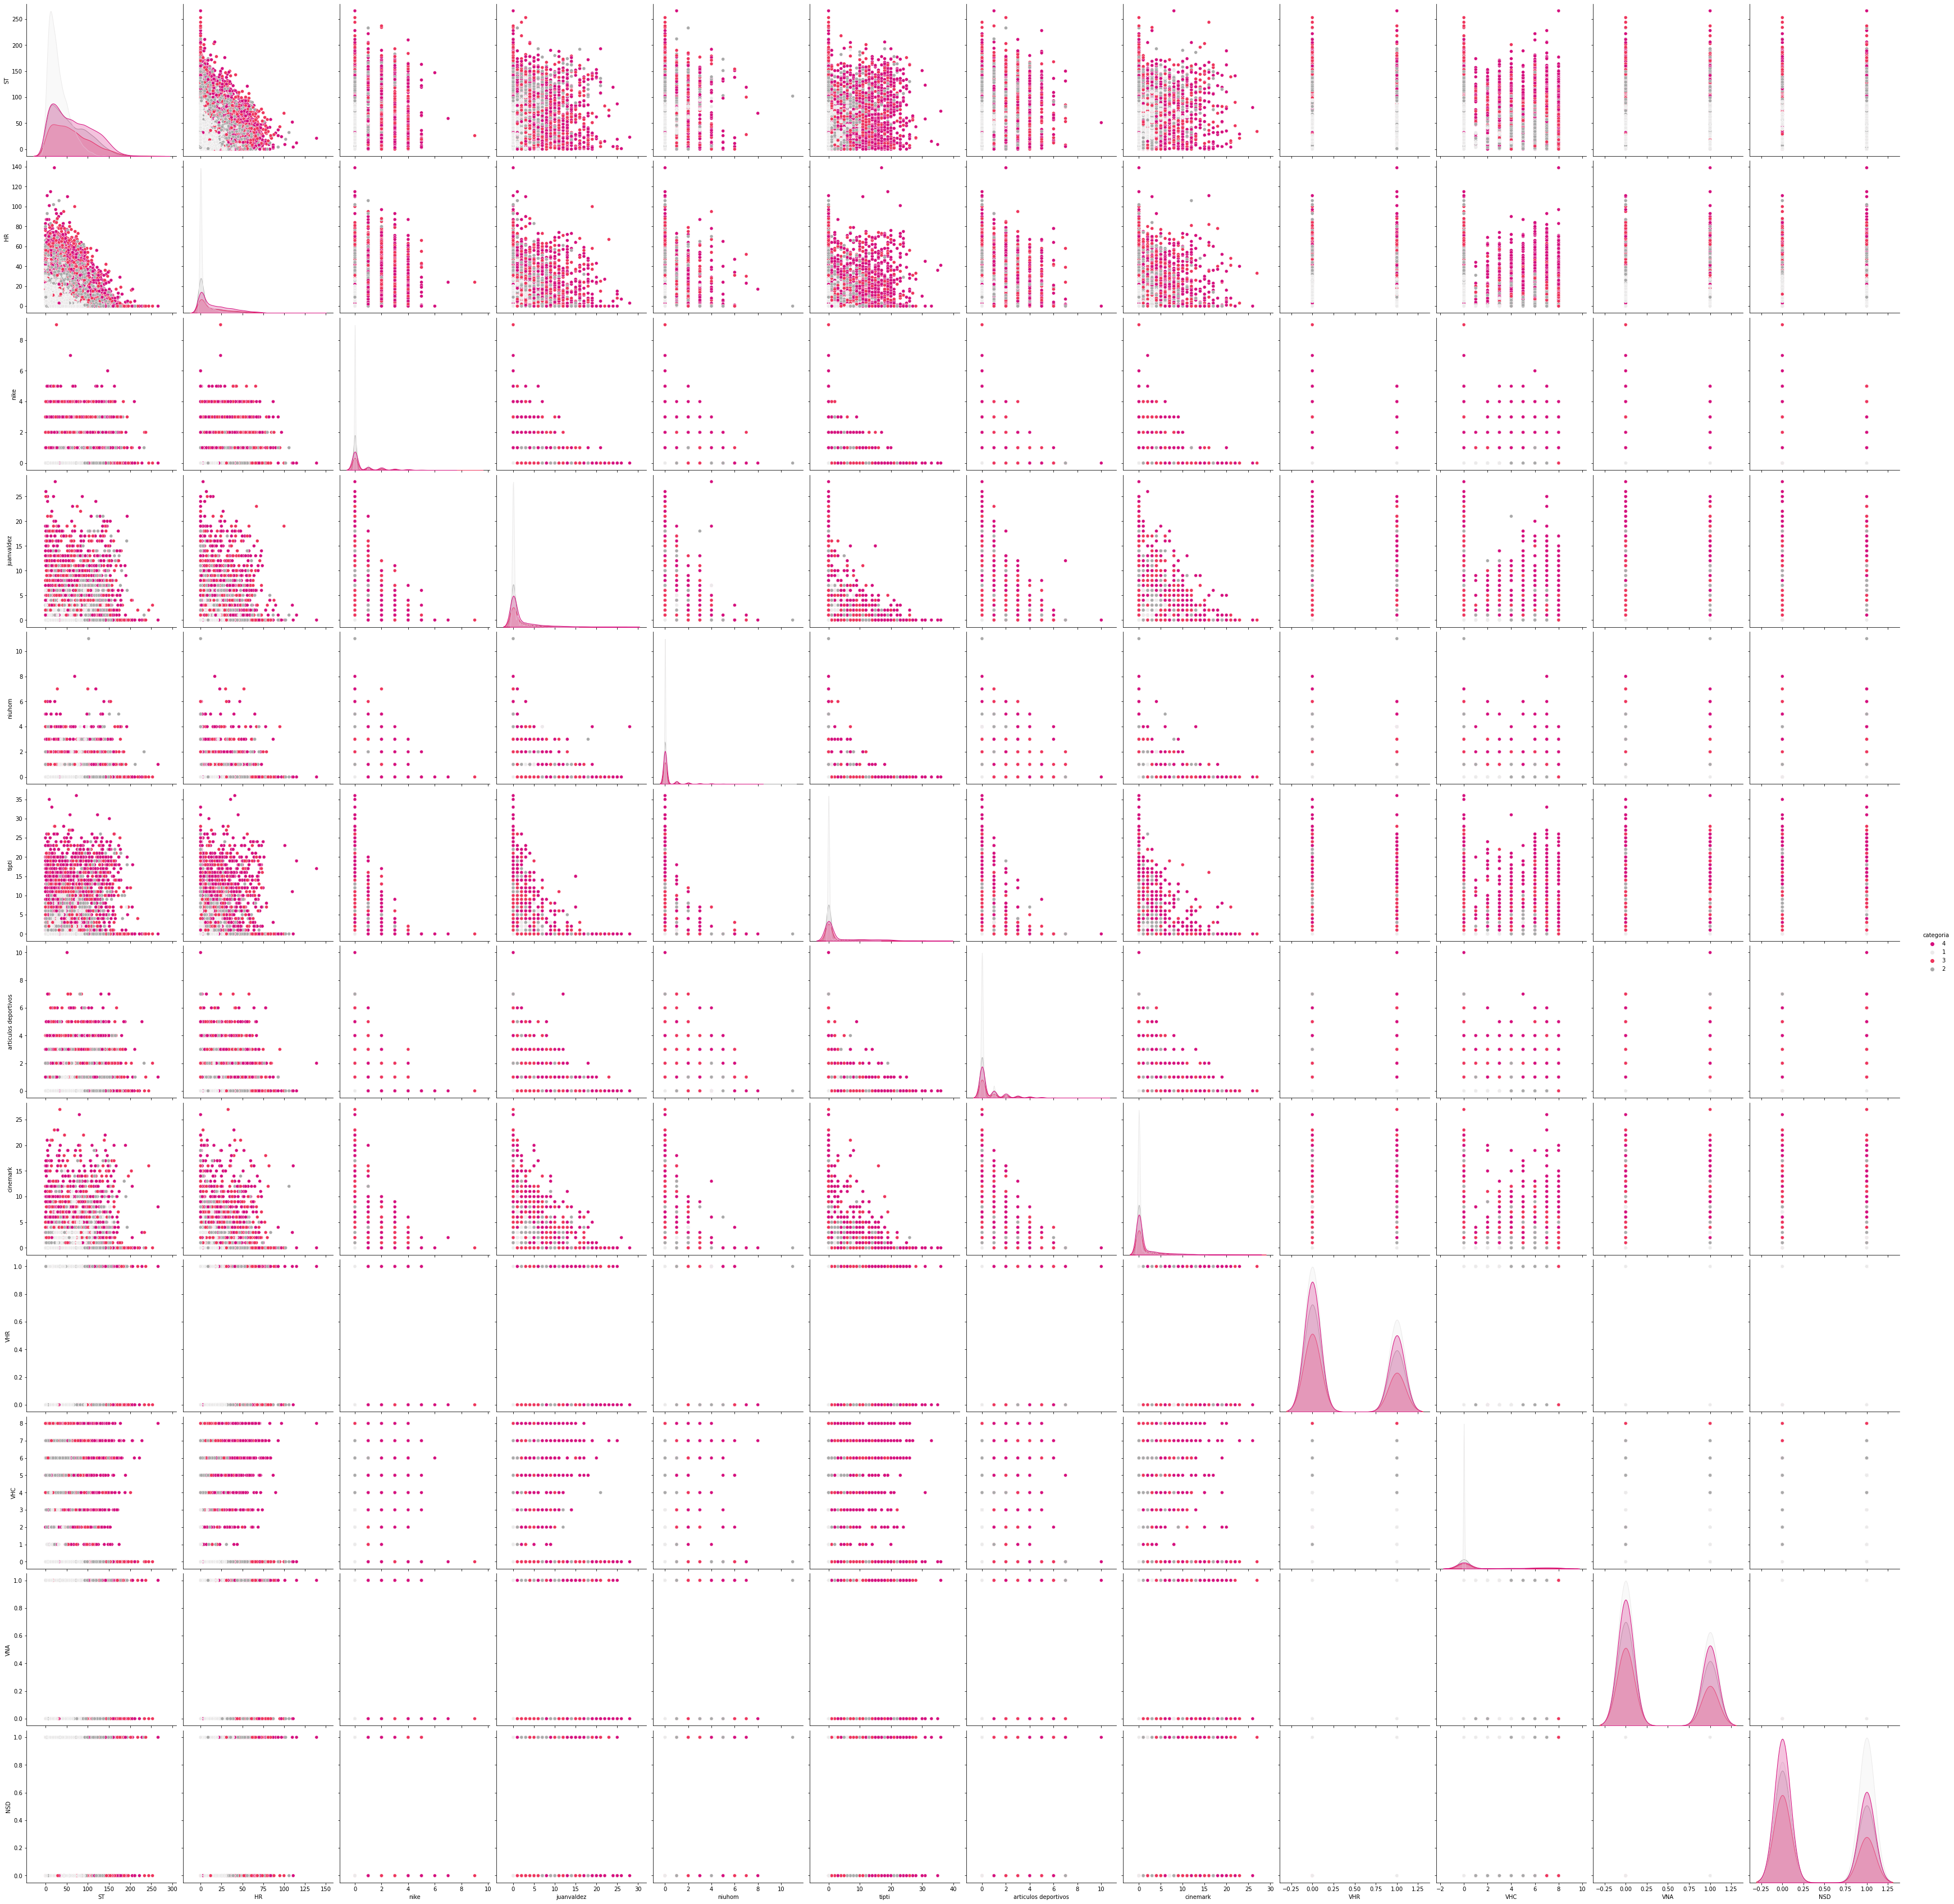

In [ ]:
import seaborn as sb
sb.pairplot(df1.dropna(), hue='categoria',size=4,vars=["ST","HR","nike","juanvaldez","niuhom","tipti","articulos deportivos","cinemark","VHR","VHC","VNA","NSD"],kind='scatter')

In [ ]:
df1['AF'] = df1["ST"] + df1["HR"]

In [ ]:
df1['categoria'] = df1['categoria'].astype(float)

In [ ]:
X = df1.loc[:, ["premios","VHR","VHC","VNA","NSD","goal_completion","categoria"]]
X.shape

(12392, 7)

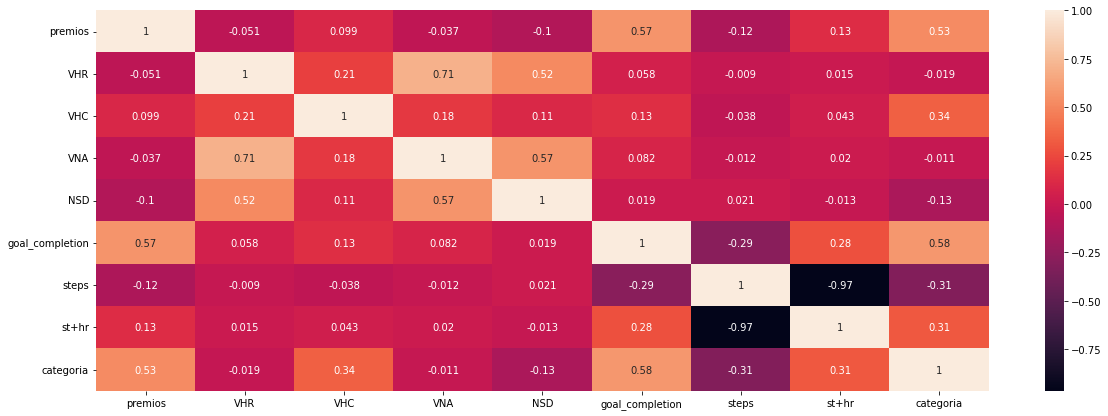

In [ ]:
plt.figure(figsize = (20,7))
sns.heatmap(X.corr(),annot = True)
plt.show()